In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.chdir("C:/Users/sherman/Documents/Open Ephys/2025-01-30_12-40-48/Record Node 114/experiment1/recording1")
ttl_path =r'events/NI-DAQmx-106.PXIe-6341/TTL'
os.chdir(ttl_path)

#exploring data structure
timestamps = np.load('timestamps.npy')
channel_states = np.load("states.npy")

# If channel_states is an integer (bit mask), split into individual channels
num_channels = int(np.ceil(np.log2(np.max(channel_states) + 1)))  # Max bits needed
channel_states_binary = ((channel_states[:, None] >> np.arange(num_channels)) & 1)

# Create DataFrame with timestamps and channel states
all_events_df = pd.DataFrame(channel_states_binary, columns=[f'channel_{i}' for i in range(num_channels)])
print(all_events_df.sum()) #-print(all_events_df.sum()) #-count instances of each ch
all_events_df.insert(0, 'timestam', timestamps)
    
print(all_events_df)

all_events_Synch=all_events_df[all_events_df["channel_0"]==0]

channel_0    2999353
channel_1    1499676
channel_2    1500275
dtype: int64
           timestam  channel_0  channel_1  channel_2
0         24.038980          1          0          0
1         24.039080          1          1          1
2         24.039179          1          0          0
3         24.039279          1          1          1
4         24.039379          1          0          0
...             ...        ...        ...        ...
2999947  323.975714          1          0          0
2999948  323.975814          1          1          1
2999949  323.975914          1          0          0
2999950  323.976014          1          1          1
2999951  323.976114          1          0          0

[2999952 rows x 4 columns]


In [9]:
print(all_events_Synch)

           timestam  channel_0  channel_1  channel_2
4611      24.500050          0          0          1
9612      25.000051          0          0          1
14613     25.500085          0          0          1
19613     26.000051          0          0          1
24615     26.500085          0          0          1
...             ...        ...        ...        ...
2975191  321.500503          0          0          1
2980192  322.000541          0          0          1
2985193  322.500505          0          0          1
2990194  323.000543          0          0          1
2995195  323.500506          0          0          1

[599 rows x 4 columns]


In [10]:
#exploring data structure- parse to only include trigger instances
print(all_events_df[all_events_df["channel_0"]==0])

           timestam  channel_0  channel_1  channel_2
4611      24.500050          0          0          1
9612      25.000051          0          0          1
14613     25.500085          0          0          1
19613     26.000051          0          0          1
24615     26.500085          0          0          1
...             ...        ...        ...        ...
2975191  321.500503          0          0          1
2980192  322.000541          0          0          1
2985193  322.500505          0          0          1
2990194  323.000543          0          0          1
2995195  323.500506          0          0          1

[599 rows x 4 columns]


In [18]:
#exploring data structure- parse to only include trigger instances
print(all_events_df[all_events_df["channel_0"]==0].diff())

        timestam  channel_0  channel_1  channel_2
3577         NaN        NaN        NaN        NaN
8578    0.500034        0.0        0.0        0.0
13579   0.499966        0.0        0.0        0.0
18580   0.500034        0.0        0.0        0.0
23581   0.499966        0.0        0.0        0.0
28582   0.500034        0.0        0.0        0.0
33583   0.499966        0.0        0.0        0.0
38584   0.500034        0.0        0.0        0.0
43585   0.499966        0.0        0.0        0.0
48586   0.500034        0.0        0.0        0.0
53587   0.499966        0.0        0.0        0.0
58588   0.500034        0.0        0.0        0.0
63589   0.499966        0.0        0.0        0.0
68590   0.500034        0.0        0.0        0.0
73591   0.499966        0.0        0.0        0.0
78592   0.500034        0.0        0.0        0.0
83592   0.499966        0.0        0.0        0.0
88593   0.500001        0.0        0.0        0.0
93594   0.500033        0.0        0.0        0.0


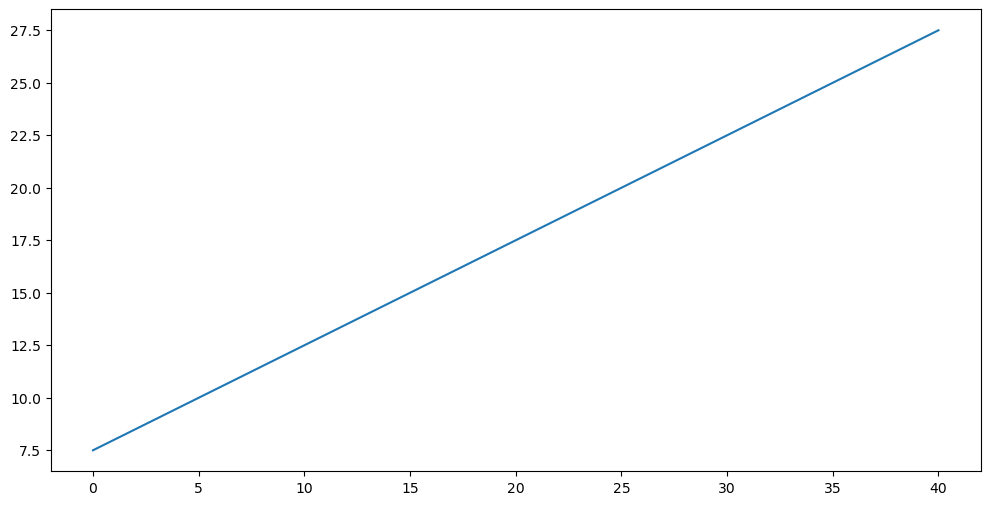

In [19]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(timestamps[all_events_df["channel_0"]==0])

In [38]:
def extract_ttl_events(ttl_path):
    timestamps_file_path = os.path.join(ttl_path, "timestamps.npy")
    channel_states_file_path = os.path.join(ttl_path, "states.npy")
    
    if not os.path.exists(timestamps_file_path) or not os.path.exists(channel_states_file_path):
        print(f"Events files do not exist: {timestamps_file_path} or {channel_states_file_path}")
        return None

    timestamps = np.load(timestamps_file_path)
    channel_states = np.load(channel_states_file_path)
    
    
    # Extract TTL events where the state changes
    events_df = pd.DataFrame({
        'timestamp': timestamps,
        'state': channel_states
    })
    
    # Only consider state changes (e.g., rising edge for stimulus onset)
    ttl_onsets = events_df[events_df['state'] == 1].reset_index(drop=True)
    
    return ttl_onsets

extract_ttl_events(ttl_path)

Events files do not exist: events/NI-DAQmx-106.PXIe-6341/TTL/timestamps.npy or events/NI-DAQmx-106.PXIe-6341/TTL/states.npy


In [22]:
def extract_ttl_events_all_channels(ttl_path):
    timestamps_file_path = os.path.join(ttl_path, "timestamps.npy")
    channel_states_file_path = os.path.join(ttl_path, "states.npy")
    
    if not os.path.exists(timestamps_file_path) or not os.path.exists(channel_states_file_path):
        print(f"Events files do not exist: {timestamps_file_path} or {channel_states_file_path}")
        return None

    timestamps = np.load(timestamps_file_path)
    channel_states = np.load(channel_states_file_path)
    print(set(channel_states)) #the unique values of channels

    # If channel_states is an integer (bit mask), split into individual channels
    num_channels = int(np.ceil(np.log2(np.max(channel_states) + 1)))  # Max bits needed
    channel_states_binary = ((channel_states[:, None] >> np.arange(num_channels)) & 1)

    # Create DataFrame with timestamps and channel states
    all_events_df = pd.DataFrame(channel_states_binary, columns=[f'channel_{i}' for i in range(num_channels)])
    print(all_events_df.sum())
    all_events_df.insert(0, 'timestam', timestamps)
    
    return all_events_df
    

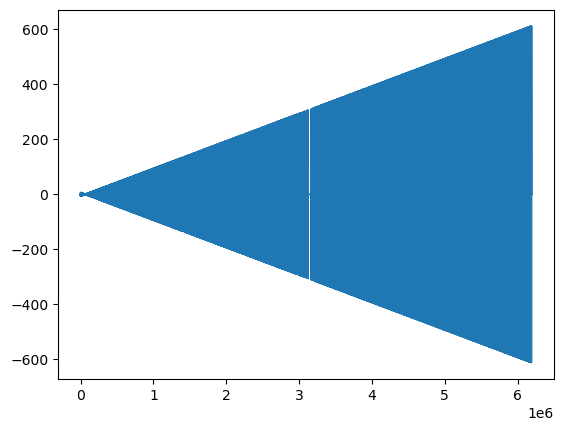

In [36]:
import matplotlib.pyplot as plt
timestamps_file_path = os.path.join("timestamps.npy")
timestamps = np.load(timestamps_file_path)
plt.plot(np.diff(timestamps))#[0:15000])

In [5]:
pwd

'/Users/brianacarroll/Downloads/forGit/events/NI-DAQmx-106.PXIe-6341/TTL'

In [6]:
extract_ttl_events_all_channels(ttl_path)

Events files do not exist: events/NI-DAQmx-106.PXIe-6341/TTL/timestamps.npy or events/NI-DAQmx-106.PXIe-6341/TTL/states.npy


In [55]:
import matplotlib.pyplot as plt

def extract_and_plot_ttl_events(ttl_path):
    timestamps_file_path = os.path.join(ttl_path, "timestamps.npy")
    channel_states_file_path = os.path.join(ttl_path, "states.npy")
    
    if not os.path.exists(timestamps_file_path) or not os.path.exists(channel_states_file_path):
        print(f"Events files do not exist: {timestamps_file_path} or {channel_states_file_path}")
        return None

    timestamps = np.load(timestamps_file_path)
    channel_states = np.load(channel_states_file_path)
    

    # If channel_states is an integer (bit mask), split into individual channels
    num_channels = int(np.ceil(np.log2(np.max(channel_states) + 1)))  # Max bits needed
    channel_states_binary = ((channel_states[:, None] >> np.arange(num_channels)) & 1)

    # Create DataFrame with timestamps and channel states
    all_events_df = pd.DataFrame(channel_states_binary, columns=[f'channel_{i}' for i in range(num_channels)])
    all_events_df.insert(0, 'timestamp', timestamps)

    # Limit to the first 20 timestamps
    X=100
    limited_events_df = all_events_df.iloc[:X]

    # Plot each channel's state over time
    plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
    for i =in range(num_channels):
        plt.plot(
            limited_events_df['timestamp'], 
            limited_events_df[f'channel_{i}'], 
            label=f'Channel {i}'
        )
    
    # Customize plot
    plt.xlabel("Time (seconds)")
    plt.ylabel("State (0 or 1)")
    plt.title("TTL States Over Time (First X Timestamps)")
    plt.legend(loc="upper right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return limited_events_df

extract_and_plot_ttl_events(ttl_path)

SyntaxError: invalid syntax (747596504.py, line 29)

[-4 -7  7 ... -7  7 -7]


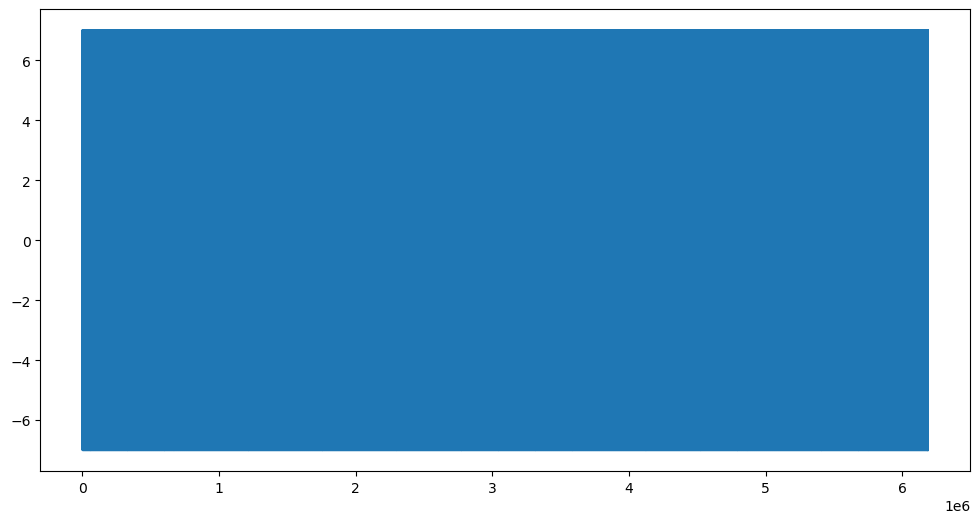

In [57]:
timestamps_file_path = os.path.join(ttl_path, "timestamps.npy")
channel_states_file_path = os.path.join(ttl_path, "states.npy")

timestamps = np.load(timestamps_file_path)
channel_states = np.load(channel_states_file_path)

plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(channel_states)
print(channel_states)